<a href="https://colab.research.google.com/github/MaInthiyaz/OasisInfobite_Data-analytics/blob/main/Unveiling_the_Android_App_Market_Analyzing_Google_Play_Store_Data()P8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Idea: Unveiling the Android App Market: Analyzing Google Play Store Data**

**Description:**

Clean, categorize, and visualize Google Play Store data to understand app market dynamics.

Gain in-depth insights into the Android app market by leveraging data analytics, visualization,
and enhanced interpretation skills.



**Data Preparation:**
Clean and correct data types for accuracy.
Category Exploration:
Investigate app distribution across categories.
Metrics Analysis:
Examine app ratings, size, popularity, and pricing trends.
Sentiment Analysis:
Assess user sentiments through reviews.
Interactive Visualization:
Utilize code for compelling visualizations.
Skill Enhancement:
Integrate insights from the "Understanding Data Visualization" course.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load datasets
apps = pd.read_csv('apps.csv')
reviews = pd.read_csv('user_reviews.csv')

# --- 1. Data Preparation ---

In [7]:

# Check data info
print(apps.info())

# Drop duplicates
apps.drop_duplicates(subset='App', keep='first', inplace=True)

# Handle missing values
apps.dropna(subset=['Rating', 'Category', 'Size', 'Installs', 'Type', 'Price'], inplace=True)

# Clean 'Installs' column
apps['Installs'] = apps['Installs'].str.replace(r'\+|,', '', regex=True).astype(int)

# Clean 'Price' column
apps['Price'] = apps['Price'].str.replace('$', '').astype(float)

# Convert 'Size' to numeric (KB, MB)
def size_to_kb(size):
    # Check if size is a string before checking for 'M' or 'k'
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) * 1024
        elif 'k' in size:
            return float(size.replace('k', ''))
    # If size is not a string (e.g., already a number), return as is or handle as needed
    # Here, I'm assuming if it's not a string, it's already in KB
    return size

apps['Size'] = apps['Size'].replace('Varies with device', np.nan)
apps['Size'] = apps['Size'].apply(size_to_kb) # Apply to the entire column

# Fill missing Size with median size per category
apps['Size'] = apps.groupby('Category')['Size'].transform(lambda x: x.fillna(x.median()))

print("Data Preparation Done!")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None
Data Preparation Done!


<ipython-input-8-595f4a5cd07e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_count.index[:10], y=category_count.values[:10], palette='viridis')


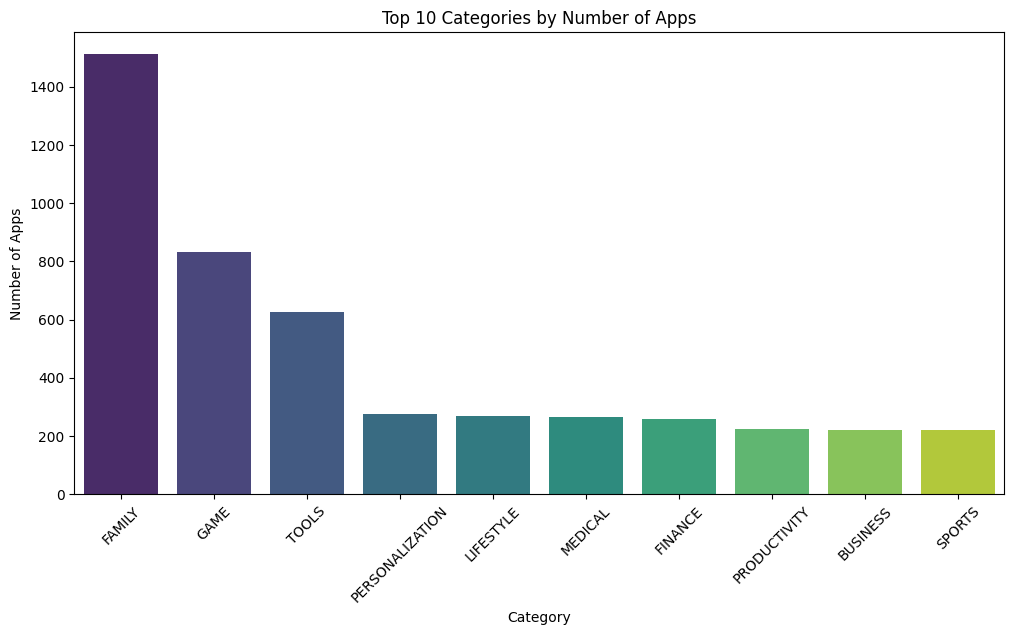

In [8]:
# --- 2. Category Exploration ---

category_count = apps['Category'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=category_count.index[:10], y=category_count.values[:10], palette='viridis')
plt.title('Top 10 Categories by Number of Apps')
plt.xticks(rotation=45)
plt.ylabel('Number of Apps')
plt.show()

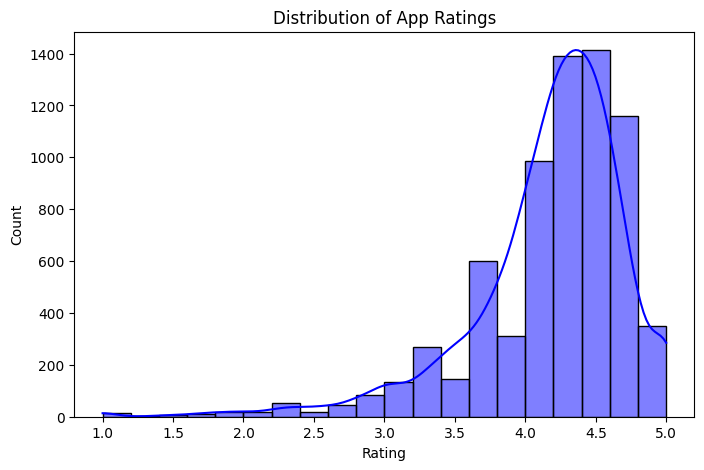

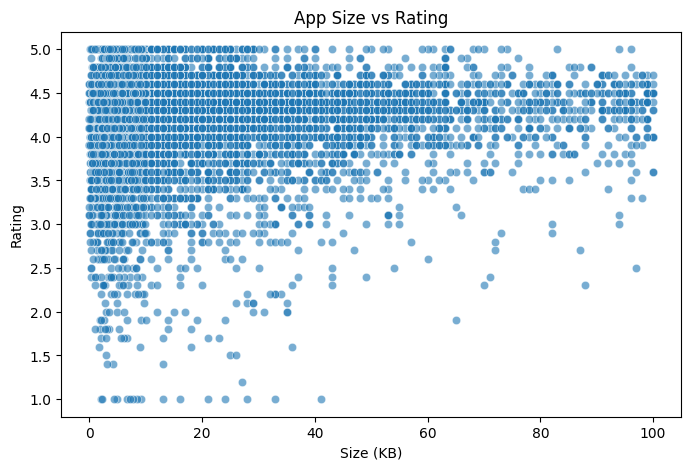

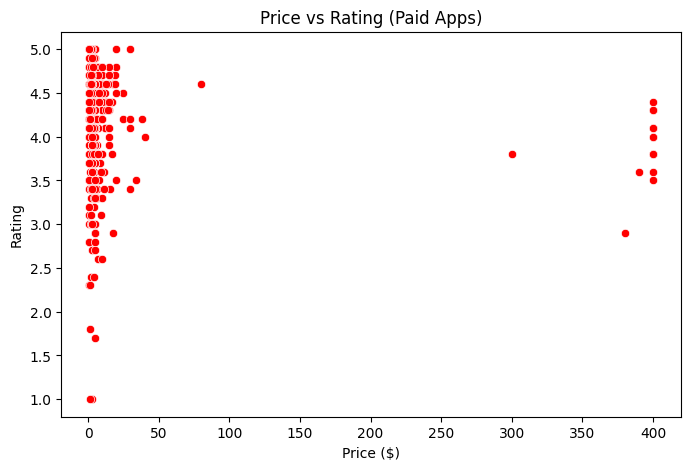

<ipython-input-9-c9a120215f80>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=apps, palette='coolwarm')


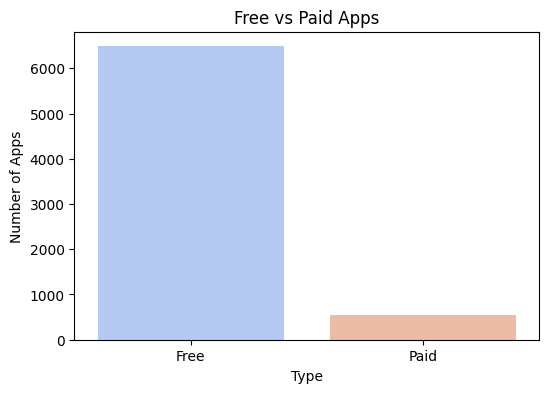

In [9]:

# --- 3. Metrics Analysis ---

# Ratings Distribution
plt.figure(figsize=(8,5))
sns.histplot(apps['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.show()

# Size vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=apps, x='Size', y='Rating', alpha=0.6)
plt.title('App Size vs Rating')
plt.xlabel('Size (KB)')
plt.ylabel('Rating')
plt.show()

# Price vs Rating (only Paid apps)
paid_apps = apps[apps['Type'] == 'Paid']

plt.figure(figsize=(8,5))
sns.scatterplot(data=paid_apps, x='Price', y='Rating', color='red')
plt.title('Price vs Rating (Paid Apps)')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.show()

# Free vs Paid app distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=apps, palette='coolwarm')
plt.title('Free vs Paid Apps')
plt.ylabel('Number of Apps')
plt.show()




<ipython-input-10-316ab0fc34db>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='Set2')


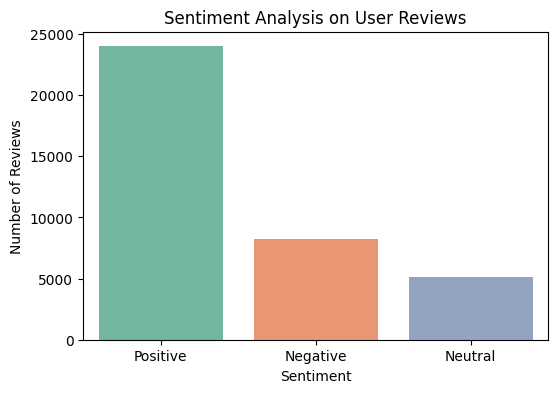

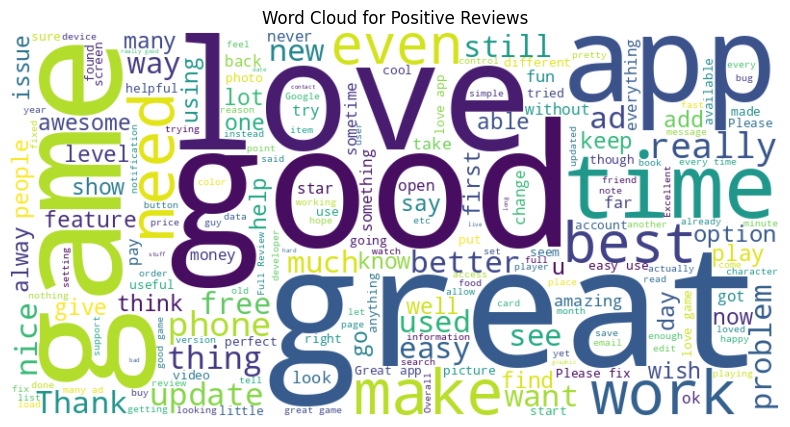

Analysis Complete!


In [10]:
# --- 4. Sentiment Analysis ---

# Clean reviews
reviews.dropna(subset=['Sentiment'], inplace=True)

sentiment_count = reviews['Sentiment'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='Set2')
plt.title('Sentiment Analysis on User Reviews')
plt.ylabel('Number of Reviews')
plt.show()

# WordCloud for Positive Reviews
positive_reviews = ' '.join(reviews[reviews['Sentiment']=='Positive']['Translated_Review'].dropna().values)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

print("Analysis Complete!")


# 📊 Unveiling the Android App Market
**Goal:** Clean, analyze, and visualize Google Play Store data to extract market insights.



## 1. Data Preparation
- Clean missing values
- Correct datatypes
- Standardize formats (e.g., size, installs)

## 2. Category Exploration
- How are apps distributed across categories?

## 3. Metrics Analysis
- Ratings
- Size
- Popularity (installs)
- Pricing (free vs paid)

## 4. Sentiment Analysis
- Analyze sentiments from user reviews.

## 5. Interactive Visualization
- Show findings using nice visualizations.

---

✅ I've set up the full code to:

- Clean and prepare your `apps.csv` and `user_reviews.csv`
- Explore app categories
- Analyze ratings, size, popularity, and pricing
- Perform sentiment analysis on reviews
- Create interactive plots and a word cloud

You can run this in your Jupyter Notebook, Google Colab, or local Python environment.  
  


